In [3]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

In [4]:
df = pd.read_csv('scrap price.csv')

In [5]:
#1_1. shape This is to know the number of rows and columns - shape of the data
df.shape

(205, 26)

In [6]:
#1_2. df.info(). This is know the number of non-null entries, # of columns, datatypes & memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
#1_3 df.head() - This is used to display the first five records.
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
#1_4. df.head().transpose()

df.head().transpose()

,0,1,2,3,4
ID,1,2,3,4,5
symboling,3,3,1,2,2
name,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltypes,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumbers,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheels,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4


In [9]:
#1_5 df.tail - displays the bottom 5 rows
df.tail()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [10]:
#3_1 -  use isnull() to check for missing values
# sum(): gives the sum of missing values in each column
missing_values = df.isnull().sum()

# print the missing values
missing_values

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
# get the count of missing values
missing_values = df.isnull().sum()

# check for missing values
total = df.isnull().sum().sort_values(ascending=False)

# calculate percentage of the missing values
percent = ((df.isnull().sum()/df.shape[0])*100)

# sort the values in descending order
# ascending: 
percent = percent.sort_values(ascending=False)

# concatenate the total missing values and percentage of the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# add the data types
missing_data['Type'] = df[missing_data.index].dtypes

# view the missing data
missing_data

,Total,Percent,Type
ID,0,0.0,int64
symboling,0,0.0,int64
highwaympg,0,0.0,int64
citympg,0,0.0,int64
peakrpm,0,0.0,int64
horsepower,0,0.0,int64
compressionratio,0,0.0,float64
stroke,0,0.0,float64
boreratio,0,0.0,float64
fuelsystem,0,0.0,object


In [12]:
#4_1_1. Five point summary - df.describe()
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
df.columns
import matplotlib.pyplot as plt

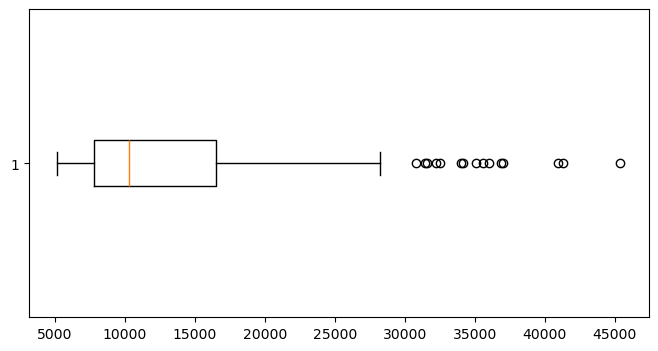

In [14]:
plt.figure(figsize=(8, 4))
plt.boxplot(x='price', data=df, vert=False)
plt.show()

In [15]:
#4_1_2. Five point summary for categorical columns - /include = object for categorical - Five Point Summary
df.describe(include=object)

,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [16]:
#4_1_2. Five point summary for categorical columns
df.describe(exclude=np.number)

,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [17]:
# check the categories of the variable 'mainroad' 
print('Categories in name:', df.name.unique())

Categories in name: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk

In [18]:
df.name.value_counts()

name
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [19]:
# check the categories of the variable 'guestroom' 
print('Categories in fueltypes', df.fueltypes.unique())

Categories in fueltypes ['gas' 'diesel']


In [20]:
df.fueltypes.value_counts()

fueltypes
gas       185
diesel     20
Name: count, dtype: int64

In [21]:
# check the categories of the variable 'Item_Type' 
print('Categories in aspiration', df.aspiration.unique())

Categories in aspiration ['std' 'turbo']


In [22]:
df.aspiration.value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [23]:
# calculate the variance
var = df.var(numeric_only=True)

# rounding off the values upto 3 decimals
round(var, 6)

ID                  3.519167e+03
symboling           1.550789e+00
wheelbase           3.626178e+01
carlength           1.522087e+02
carwidth            4.601900e+00
carheight           5.970800e+00
curbweight          2.711079e+05
enginesize          1.734114e+03
boreratio           7.335600e-02
stroke              9.834300e-02
compressionratio    1.577710e+01
horsepower          1.563741e+03
peakrpm             2.275153e+05
citympg             4.279962e+01
highwaympg          4.742310e+01
price               6.382176e+07
dtype: float64

In [24]:
df.std(numeric_only=True)

ID                    59.322565
symboling              1.245307
wheelbase              6.021776
carlength             12.337289
carwidth               2.145204
carheight              2.443522
curbweight           520.680204
enginesize            41.642693
boreratio              0.270844
stroke                 0.313597
compressionratio       3.972040
horsepower            39.544167
peakrpm              476.985643
citympg                6.542142
highwaympg             6.886443
price               7988.852332
dtype: float64

In [25]:
# filter the numeric variables from the data
df_num = df.select_dtypes(include = np.number)

In [26]:
df_num.columns

Index(['ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

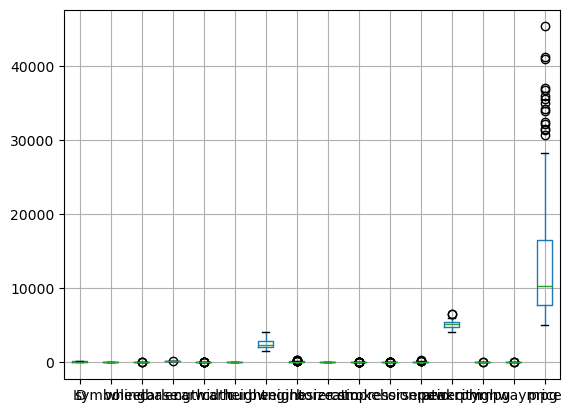

In [27]:
df_num.boxplot()
plt.show()

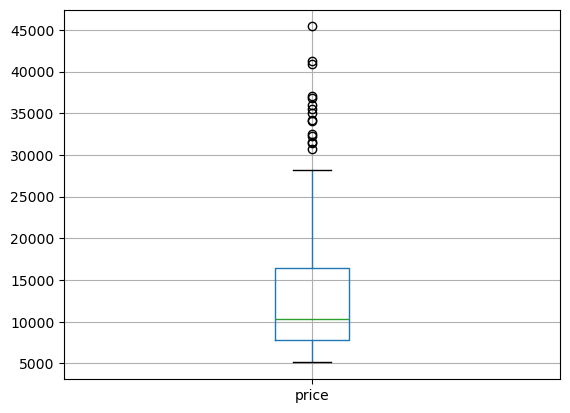

In [28]:
df_num.boxplot(column='price')
plt.show()

In [29]:
# filter the categorical variables from the data
df_cat = df.select_dtypes(exclude = np.number)
df_cat.columns

Index(['name', 'fueltypes', 'aspiration', 'doornumbers', 'carbody',
       'drivewheels', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [30]:
# find the range
print(df_num.quantile(0.75)-df_num.quantile(0.25))

ID                   102.00
symboling              2.00
wheelbase              7.90
carlength             16.80
carwidth               2.80
carheight              3.50
curbweight           790.00
enginesize            44.00
boreratio              0.43
stroke                 0.30
compressionratio       0.80
horsepower            46.00
peakrpm              700.00
citympg               11.00
highwaympg             9.00
price               8715.00
dtype: float64


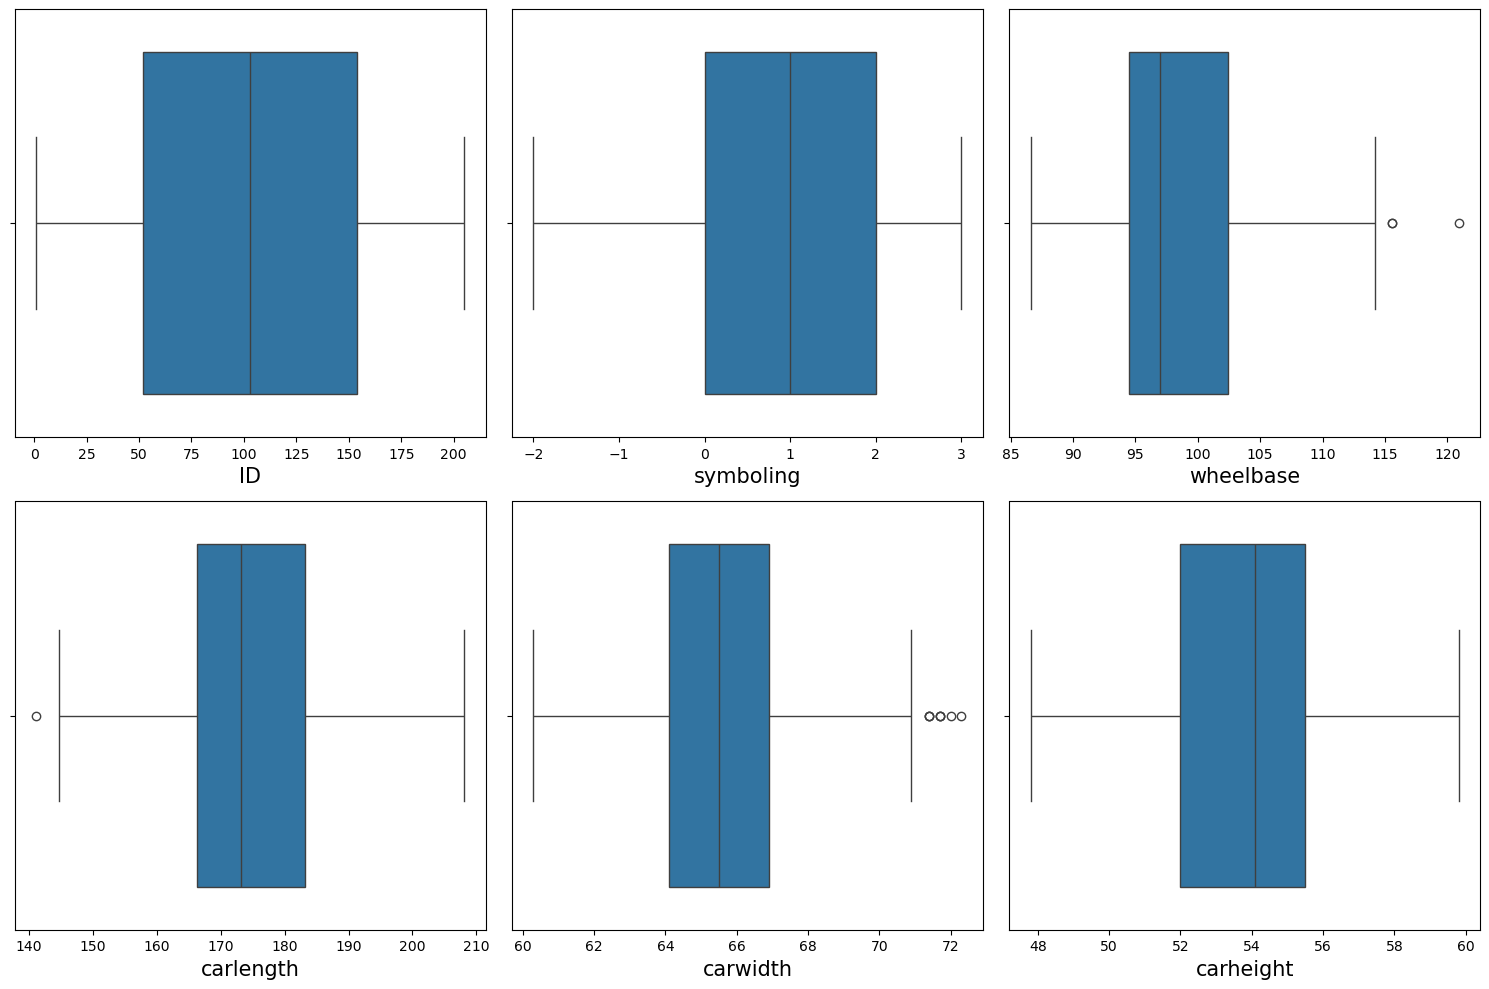

In [31]:
#4_2_1 - This is to visualize the distribution of numeric data through box plots.

import seaborn as sns
import matplotlib.pyplot as plt

# Filter the numeric columns from your DataFrame
df_num = df.select_dtypes(include=np.number)

# Create a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over the numeric columns and their corresponding subplots
for column, subplot in zip(df_num.columns, axes.flatten()):
    sns.boxplot(x=df[column], ax=subplot)
    subplot.set_xlabel(column, fontsize=15)

plt.tight_layout()
plt.show()

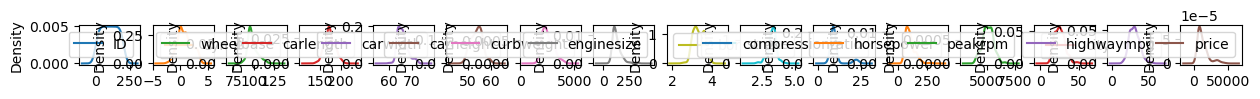

In [32]:
#4_2_2 - This is to visualize the distribution of variables in a DataFrame using density plots
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (16,16), sharex = False)

# show plot
plt.show()

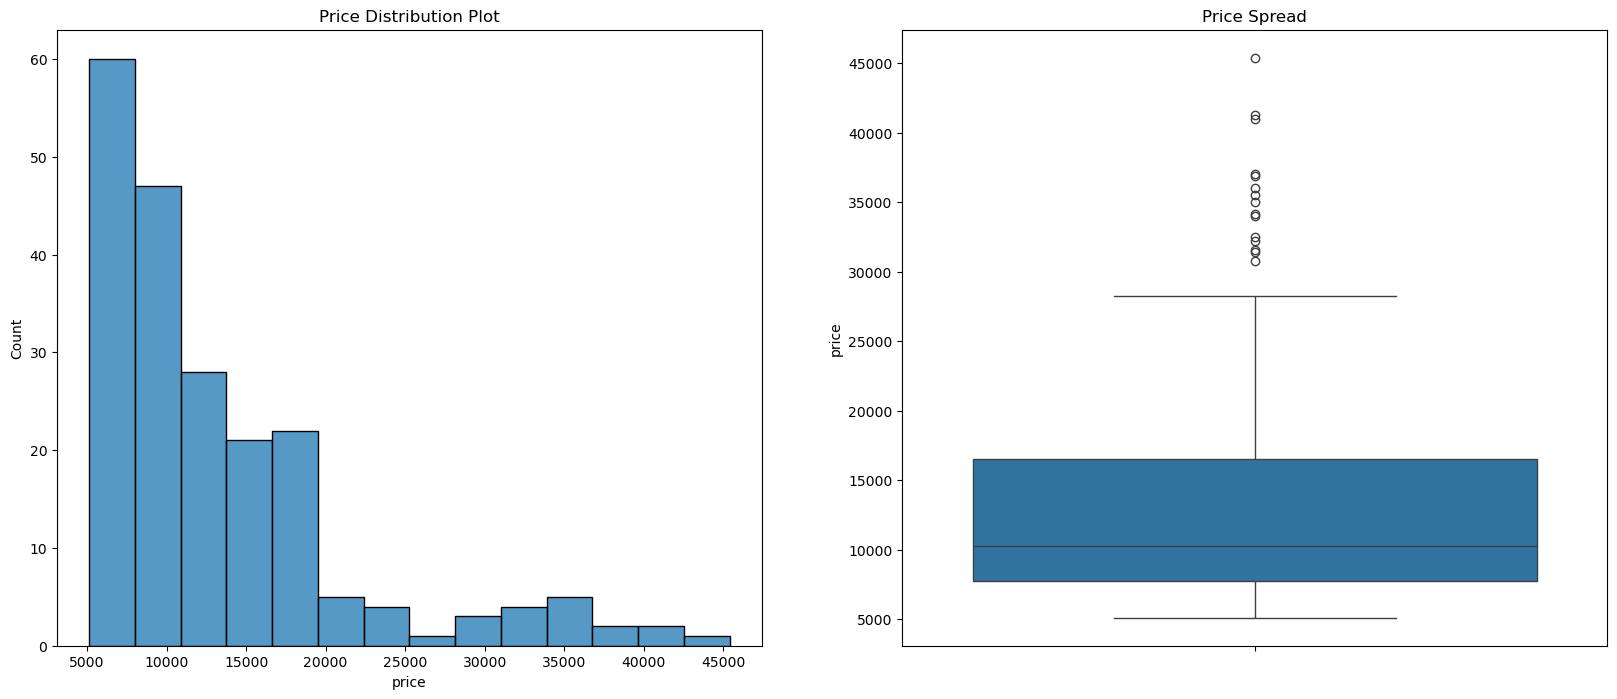

In [33]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
sns.histplot(df.price)

plt.subplot(1,2,2)
plt.title('Price Spread')
sns.boxplot(y=df.price)

plt.show()

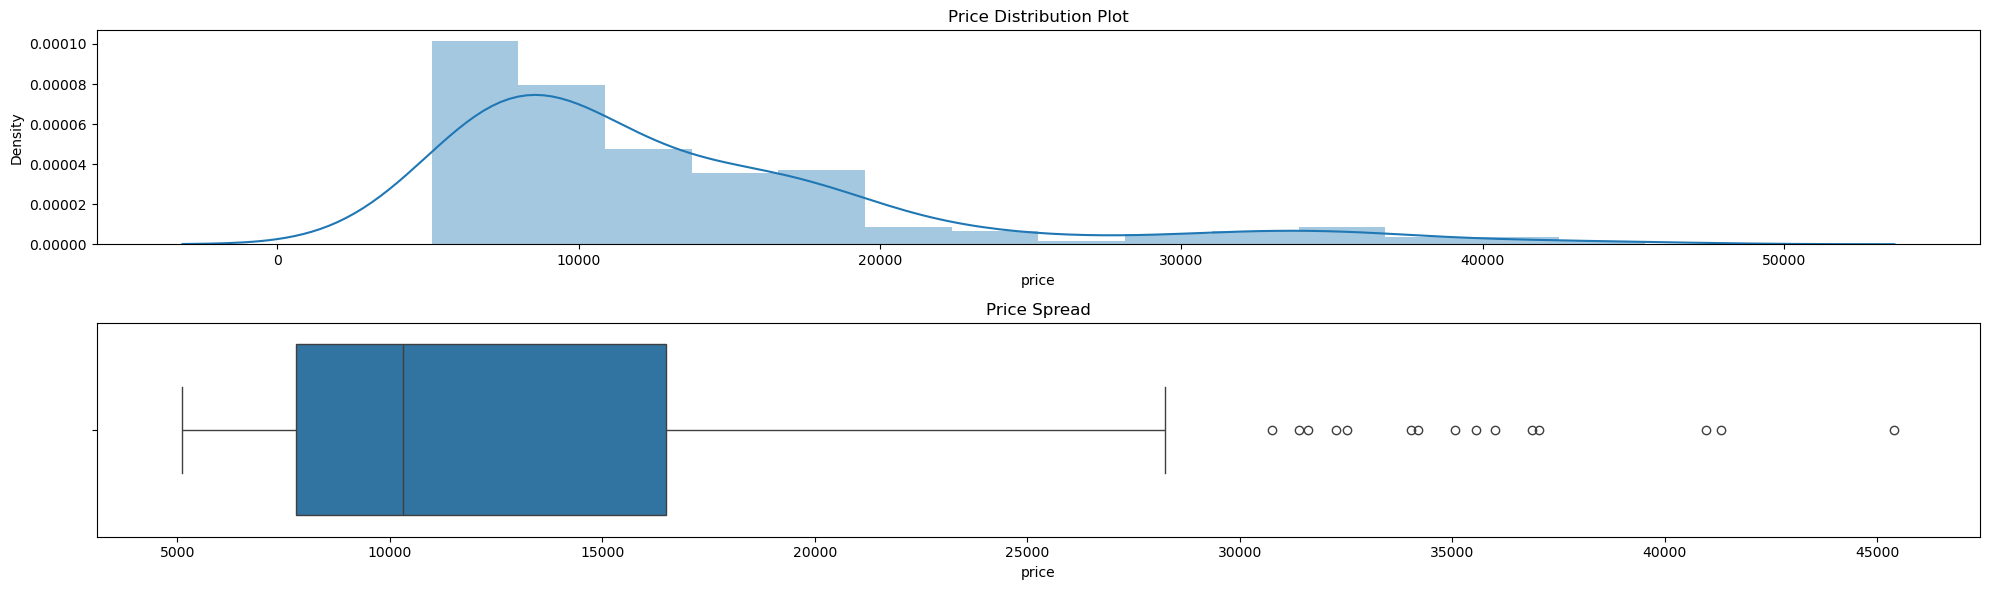

In [34]:
plt.figure(figsize=(20,6))

plt.subplot(2,1,1)  # Create two rows, one column, and select the first subplot
plt.title('Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(2,1,2)  # Create two rows, one column, and select the second subplot
plt.title('Price Spread')
sns.boxplot(x=df.price, orient="h")

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

In [35]:
df_num.price.mean(), df_num.price.median(), df_num.price.mode()

(13276.710570731706,
 10295.0,
 0      5572.0
 1      6229.0
 2      6692.0
 3      7295.0
 4      7609.0
 5      7775.0
 6      7898.0
 7      7957.0
 8      8495.0
 9      8845.0
 10     8916.5
 11     8921.0
 12     9279.0
 13    13499.0
 14    16500.0
 15    18150.0
 Name: price, dtype: float64)

In [36]:
df_num.price.skew()

1.7776781560914454

In [37]:
df_num.price.kurtosis()

3.051647871396399

In [38]:
df_num.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

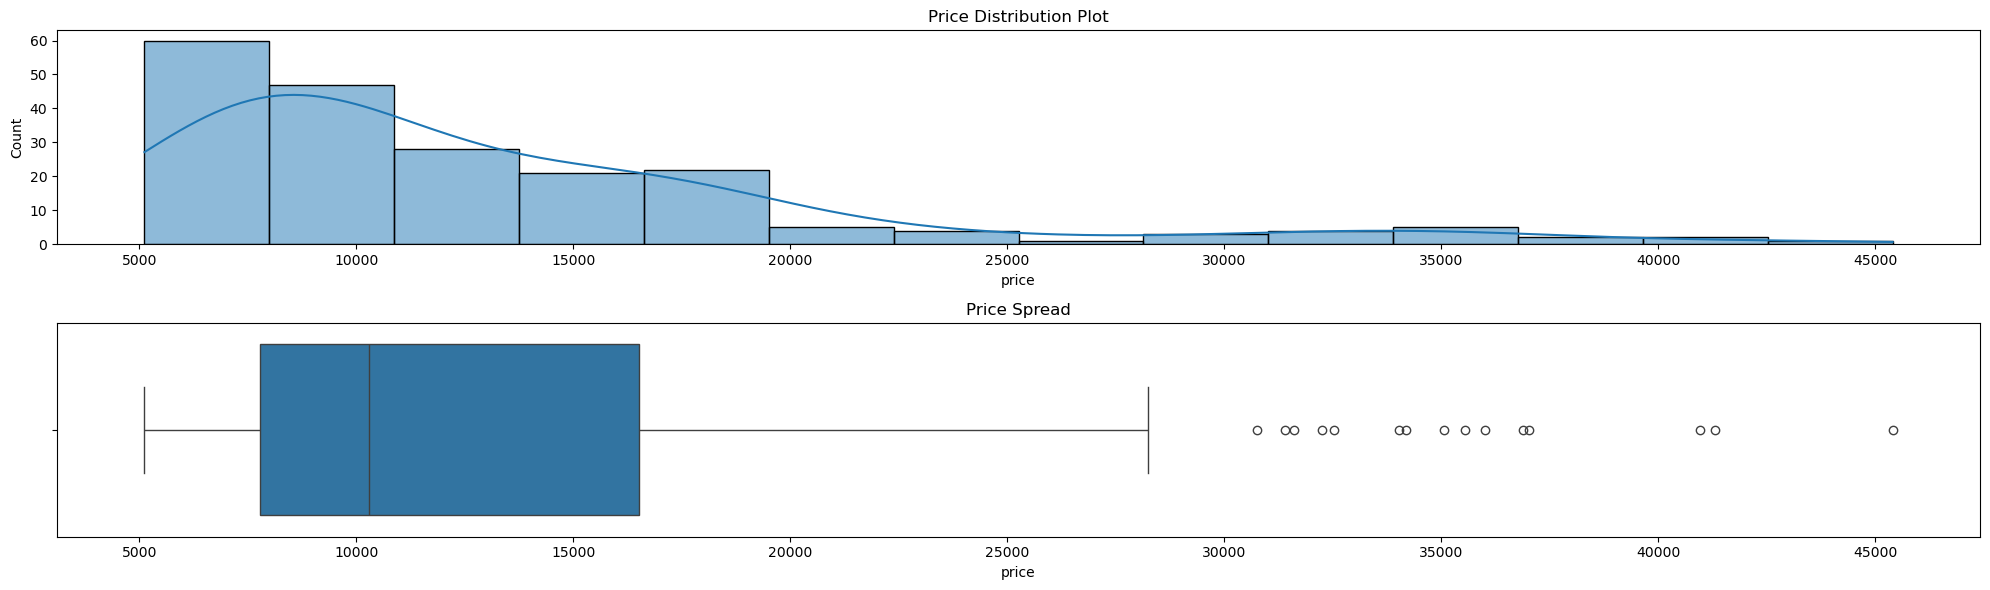

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))

plt.subplot(2,1,1)  # Create two rows, one column, and select the first subplot
plt.title('Price Distribution Plot')
sns.histplot(df.price, kde=True)

plt.subplot(2,1,2)  # Create two rows, one column, and select the second subplot
plt.title('Price Spread')
sns.boxplot(x=df.price, orient="h")

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


In [40]:
df_num.columns

Index(['ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

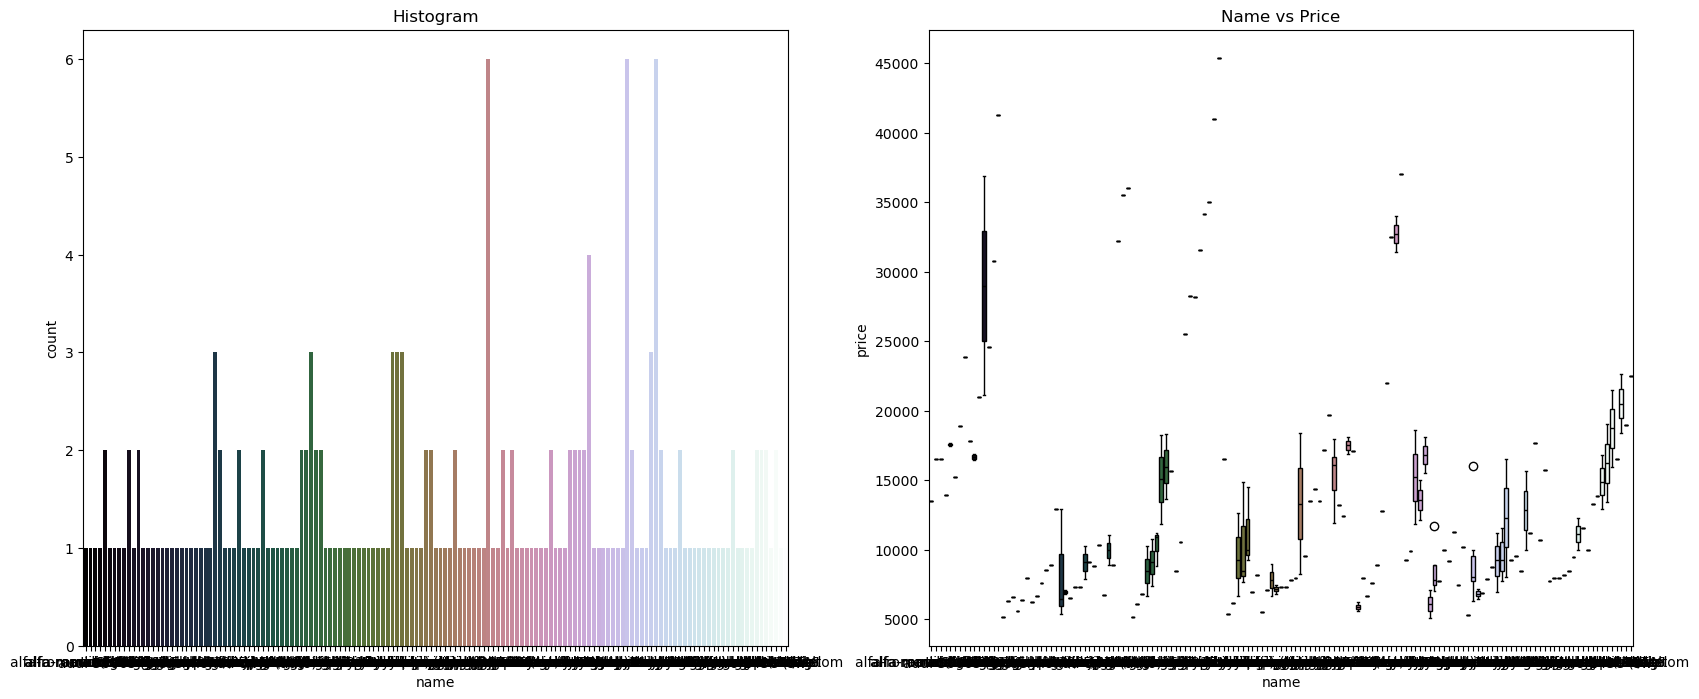

In [41]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histogram')
sns.countplot(x='name', palette=("cubehelix"), data=df)

plt.subplot(1,2,2)
plt.title('Name vs Price')
sns.boxplot(data=df, x='name', y='price', palette=("cubehelix"))

plt.show()

In [42]:
df_num.price.value_counts()

price
8921.0     2
9279.0     2
7898.0     2
8916.5     2
7775.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: count, Length: 189, dtype: int64

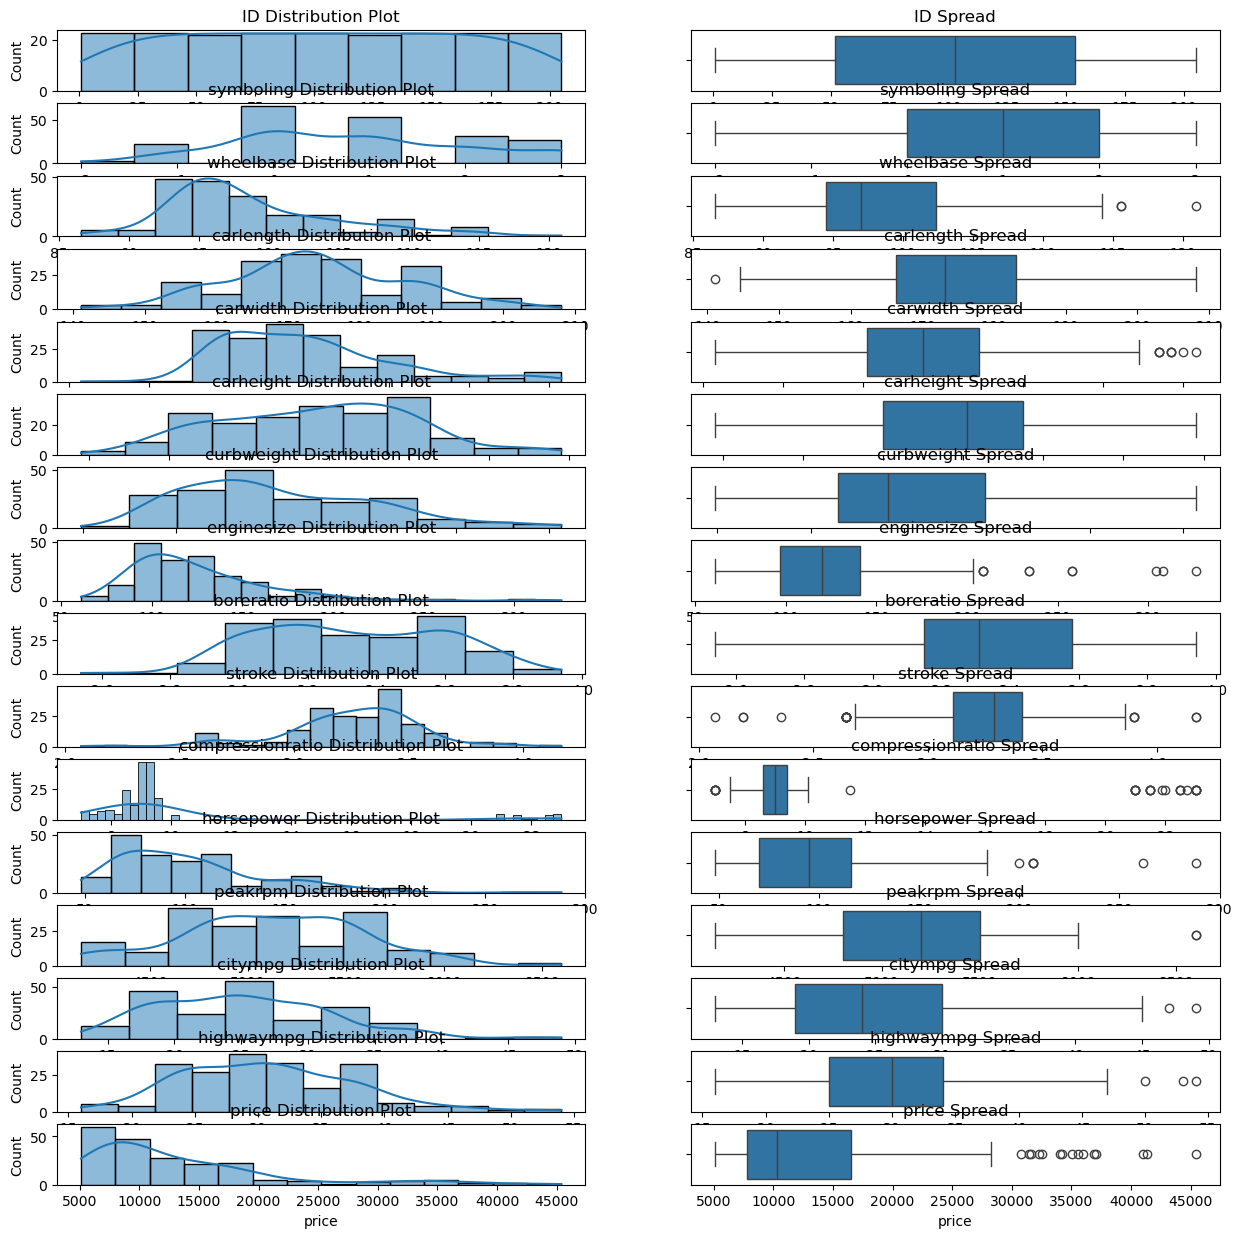

In [43]:
# Determine the number of rows and columns for subplots based on the number of numeric columns
n_rows = len(df_num.columns)
n_cols = 2  # Two plots per column (histogram and box plot)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Iterate over the numeric columns and their corresponding subplots
for i, column in enumerate(df_num.columns):
    sns.histplot(df[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{column} Distribution Plot')
    
    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'{column} Spread')

plt.tight_layout(pad=4.0)
plt.show()

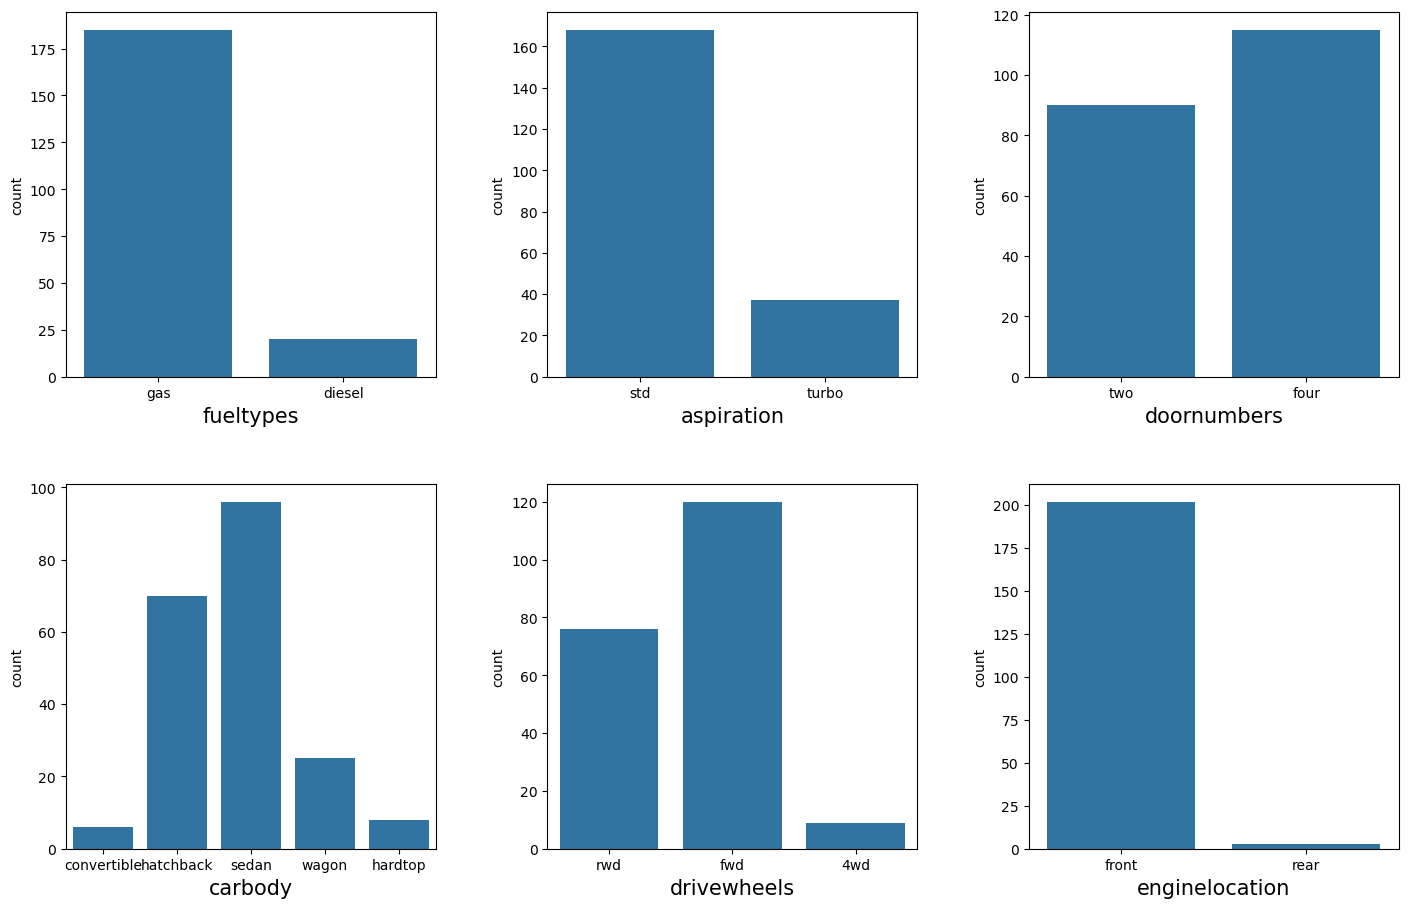

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get a list of categorical variables from the DataFrame
categorical_variables = df_cat.columns[1:]

# Calculate the number of rows and columns for subplots
num_rows = 2
num_cols = 3

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Iterate over categorical variables and their corresponding subplots
for variable, subplot in zip(categorical_variables, axes.flatten()):
    sns.countplot(data=df, x=variable, ax=subplot)
    subplot.set_xticklabels(subplot.get_xticklabels())
    subplot.set_xlabel(variable, fontsize=15)

plt.tight_layout(pad=4.0)
plt.show()


In [45]:
# use skew() to calculate the skewness
skew = df.skew(numeric_only=True)

# print the skewness
print(skew)

ID                  0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64


In [46]:
# use kurt() to calculate the kurtosis
df.kurt(numeric_only=True)

ID                 -1.200000
symboling          -0.676271
wheelbase           1.017039
carlength          -0.082895
carwidth            0.702764
carheight          -0.443812
curbweight         -0.042854
enginesize          5.305682
boreratio          -0.785042
stroke              2.174396
compressionratio    5.233054
horsepower          2.684006
peakrpm             0.086756
citympg             0.578648
highwaympg          0.440070
price               3.051648
dtype: float64

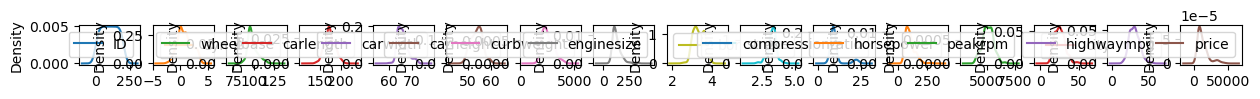

In [47]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (16,16), sharex = False)

# show plot
plt.show()

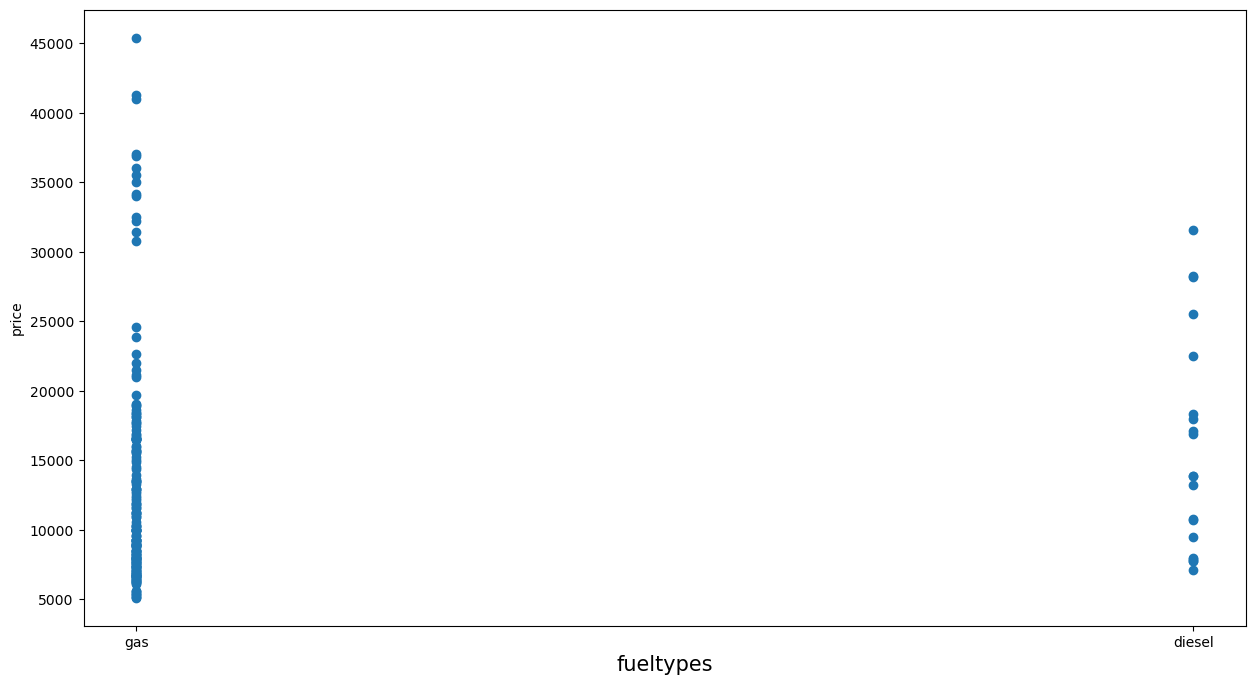

In [48]:
# initialize the figure 
# figsize: set the plot size
fig, ax = plt.subplots(figsize=(15,8))

# plot the scatter plot
ax.scatter(df["fueltypes"], df["price"])

# set the x-axis label
# fontsize: set the font size of the label
ax.set_xlabel("fueltypes", fontsize = 15)

# set the y-axis label
# fontsize: set the font size of the label
ax.set_ylabel('price')
plt.show()

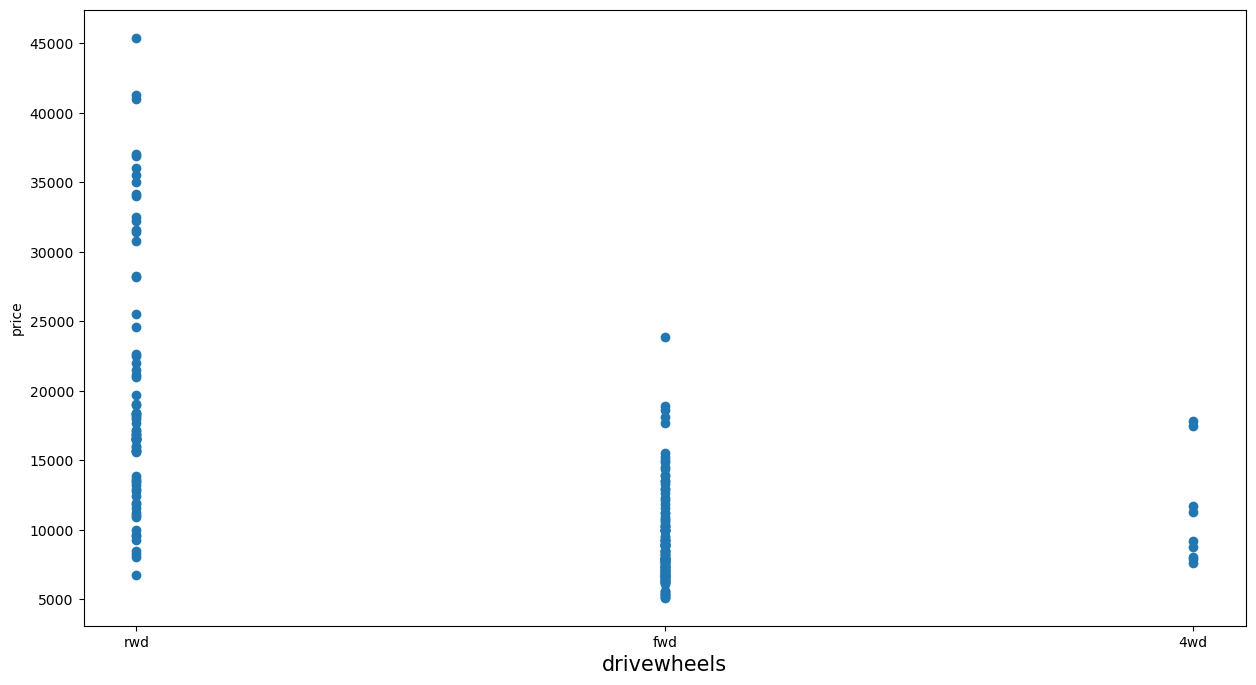

In [49]:
# initialize the figure 
# figsize: set the plot size
fig, ax = plt.subplots(figsize=(15,8))

# plot the scatter plot
ax.scatter(df["drivewheels"], df["price"])

# set the x-axis label
# fontsize: set the font size of the label
ax.set_xlabel("drivewheels", fontsize = 15)

# set the y-axis label
# fontsize: set the font size of the label
ax.set_ylabel('price')
plt.show()

In [50]:
#Correlation

df_num.corr()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


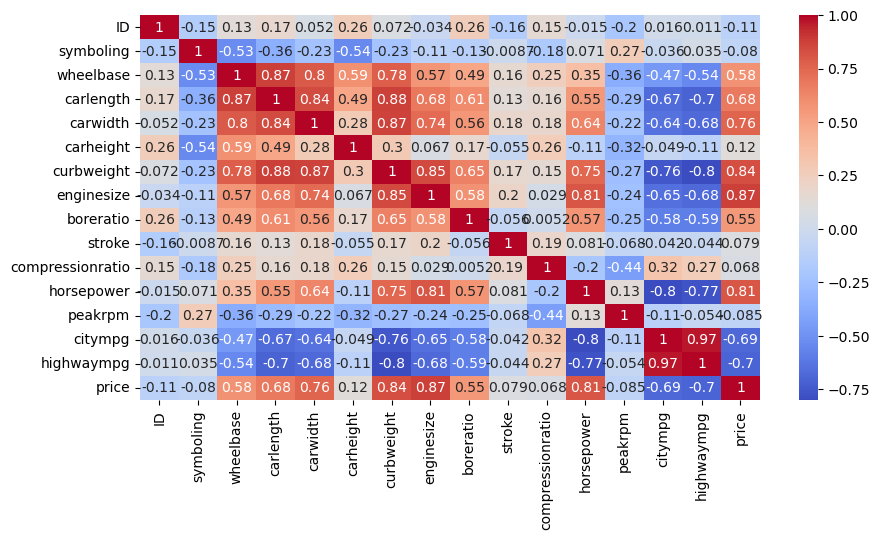

In [51]:
# Finding correlation among features using sns' heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df_num.corr(),annot=True, cmap='coolwarm')
plt.show()

In [52]:
# removing features that are less correlated with our target variable
df_num.corr()[df_num.corr().price<=0.05]

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
peakrpm,-0.203789,0.273606,-0.360469,-0.287242,-0.220012,-0.320411,-0.266243,-0.244660,-0.254976,-0.067964,-0.435741,0.131073,1.000000,-0.113544,-0.054275,-0.085267
citympg,0.015940,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,-0.584532,-0.042145,0.324701,-0.801456,-0.113544,1.000000,0.971337,-0.685751
highwaympg,0.011255,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,-0.587012,-0.043931,0.265201,-0.770544,-0.054275,0.971337,1.000000,-0.697599


In [53]:
# removing features that are less correlated with our target variable
df_num.corr().price[df_num.corr().price <= 0.05]


ID           -0.109093
symboling    -0.079978
peakrpm      -0.085267
citympg      -0.685751
highwaympg   -0.697599
Name: price, dtype: float64

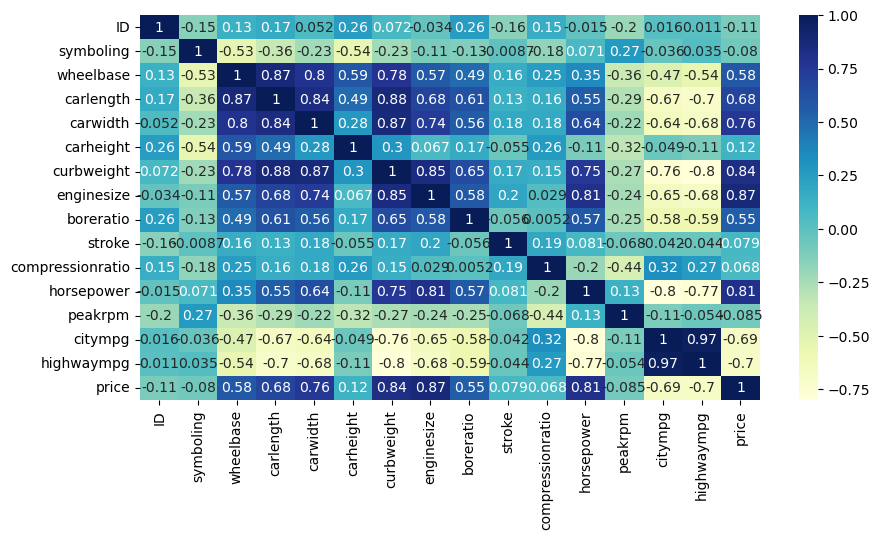

In [54]:
#Correlation using heatmap
plt.figure(figsize = (10, 5))
sns.heatmap(df_num.corr(), annot = True, cmap="YlGnBu")
plt.show()

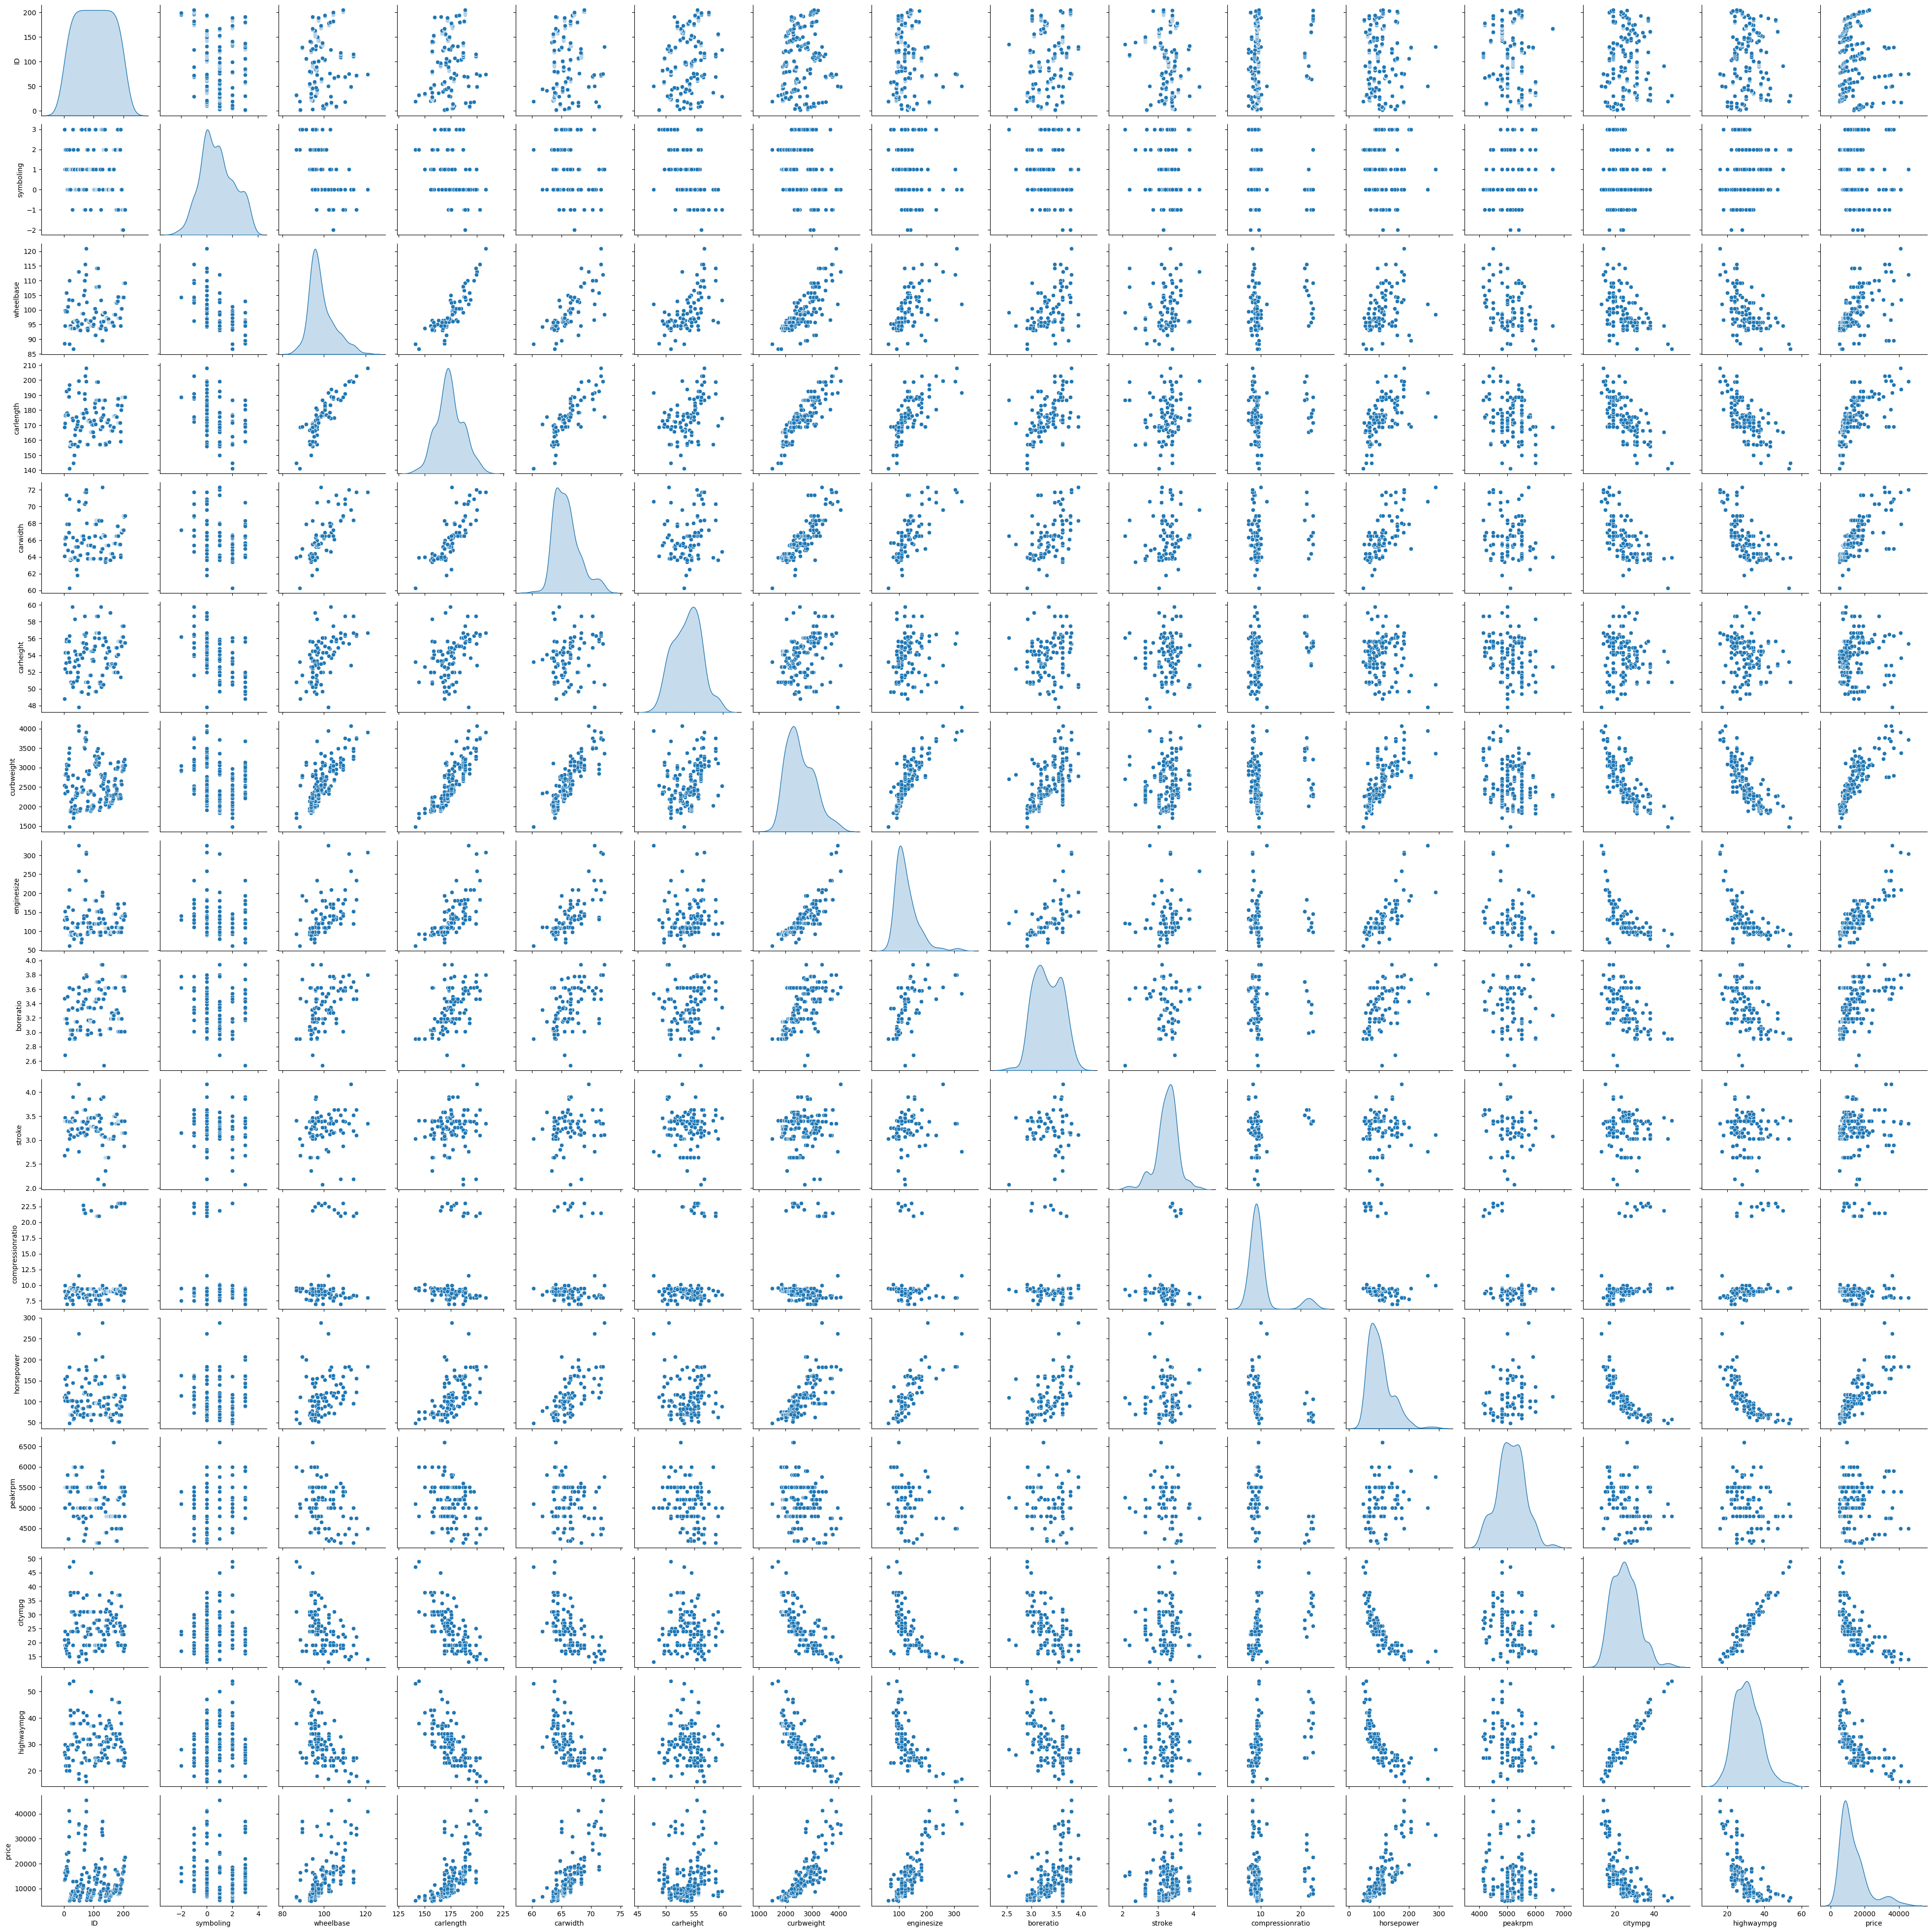

In [55]:
sns.pairplot(data=df_num, diag_kind='kde')
plt.show()

In [56]:
df.skew(numeric_only=True)

ID                  0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

In [57]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [58]:
df_cat.columns

Index(['name', 'fueltypes', 'aspiration', 'doornumbers', 'carbody',
       'drivewheels', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [59]:
df_num.columns

Index(['ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [60]:
# Assuming df is your DataFrame and columns_to_transform contains numerical columns
power_transformer = PowerTransformer()

In [61]:
power_transformer.fit_transform(df_num)

array([[-2.08096951,  1.63733562, -2.40241832, ..., -0.5867436 ,
        -0.48733788,  0.46802667],
       [-2.03531853,  1.63733562, -2.40241832, ..., -0.5867436 ,
        -0.48733788,  0.82680612],
       [-1.99383809,  0.19488044, -0.69984897, ..., -0.97741818,
        -0.65250044,  0.82680612],
       ...,
       [ 1.53301466, -1.58185484,  1.57961618, ..., -1.18833607,
        -1.18106005,  1.23411102],
       [ 1.54621569, -1.58185484,  1.57961618, ...,  0.24727543,
        -0.48733788,  1.29680855],
       [ 1.55939862, -1.58185484,  1.57961618, ..., -0.97741818,
        -0.82291501,  1.3062685 ]])

In [62]:
pt = power_transformer.fit_transform(df_num)
pt

array([[-2.08096951,  1.63733562, -2.40241832, ..., -0.5867436 ,
        -0.48733788,  0.46802667],
       [-2.03531853,  1.63733562, -2.40241832, ..., -0.5867436 ,
        -0.48733788,  0.82680612],
       [-1.99383809,  0.19488044, -0.69984897, ..., -0.97741818,
        -0.65250044,  0.82680612],
       ...,
       [ 1.53301466, -1.58185484,  1.57961618, ..., -1.18833607,
        -1.18106005,  1.23411102],
       [ 1.54621569, -1.58185484,  1.57961618, ...,  0.24727543,
        -0.48733788,  1.29680855],
       [ 1.55939862, -1.58185484,  1.57961618, ..., -0.97741818,
        -0.82291501,  1.3062685 ]])

In [63]:
df_pt = pd.DataFrame(data=pt, columns=df_num.columns)
df_pt.head()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-2.080970,1.637336,-2.402418,-0.404369,-6.661338e-16,-2.067534,0.144823,0.380332,0.525135,-1.731037,-0.014205,0.466122,-0.251058,-0.586744,-0.487338,0.468027
1,-2.035319,1.637336,-2.402418,-0.404369,-6.661338e-16,-2.067534,0.144823,0.380332,0.525135,-1.731037,-0.014205,0.466122,-0.251058,-0.586744,-0.487338,0.826806
2,-1.993838,0.194880,-0.699849,-0.205730,-2.775558e-17,-0.533373,0.647098,0.890484,-2.448083,0.670474,-0.014205,1.286257,-0.251058,-0.977418,-0.652500,0.826806
3,-1.955206,0.939497,0.365001,0.233459,2.220446e-16,0.249497,-0.303501,-0.294503,-0.510857,0.419909,0.638775,0.226519,0.792334,-0.065280,-0.020113,0.530368
4,-1.918703,0.939497,0.296266,0.233459,3.053113e-16,0.249497,0.648780,0.535529,-0.510857,0.419909,-1.035191,0.562854,0.792334,-1.188336,-1.369687,0.918904


In [64]:
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [65]:
df_pt.head()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-2.080970,1.637336,-2.402418,-0.404369,-6.661338e-16,-2.067534,0.144823,0.380332,0.525135,-1.731037,-0.014205,0.466122,-0.251058,-0.586744,-0.487338,0.468027
1,-2.035319,1.637336,-2.402418,-0.404369,-6.661338e-16,-2.067534,0.144823,0.380332,0.525135,-1.731037,-0.014205,0.466122,-0.251058,-0.586744,-0.487338,0.826806
2,-1.993838,0.194880,-0.699849,-0.205730,-2.775558e-17,-0.533373,0.647098,0.890484,-2.448083,0.670474,-0.014205,1.286257,-0.251058,-0.977418,-0.652500,0.826806
3,-1.955206,0.939497,0.365001,0.233459,2.220446e-16,0.249497,-0.303501,-0.294503,-0.510857,0.419909,0.638775,0.226519,0.792334,-0.065280,-0.020113,0.530368
4,-1.918703,0.939497,0.296266,0.233459,3.053113e-16,0.249497,0.648780,0.535529,-0.510857,0.419909,-1.035191,0.562854,0.792334,-1.188336,-1.369687,0.918904


In [66]:
mean_values = df_pt.mean(axis=0)
std_dev_values = df_pt.std(axis=0)

print("Mean values:", mean_values)
print("Standard Deviation values:", std_dev_values)


Mean values: ID                 -1.386425e-16
symboling          -1.906334e-16
wheelbase           1.357302e-05
carlength           8.093255e-15
carwidth            1.340391e-17
carheight          -1.273778e-14
curbweight          2.197483e-14
enginesize         -6.809079e-14
boreratio          -4.332578e-16
stroke              6.238912e-16
compressionratio    2.004857e-13
horsepower          4.570869e-15
peakrpm            -1.109140e-15
citympg             5.475295e-16
highwaympg         -1.998401e-16
price              -2.752053e-14
dtype: float64
Standard Deviation values: ID                  1.002448e+00
symboling           1.002448e+00
wheelbase           1.002448e+00
carlength           1.002448e+00
carwidth            7.760601e-16
carheight           1.002448e+00
curbweight          1.002448e+00
enginesize          1.002448e+00
boreratio           1.002448e+00
stroke              1.002448e+00
compressionratio    1.002448e+00
horsepower          1.002448e+00
peakrpm             1

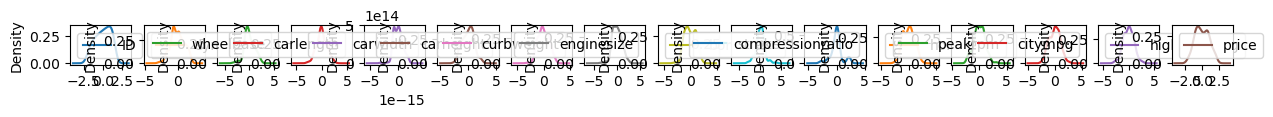

In [67]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df_pt.plot(kind = 'density', subplots = True, layout = (16,16), sharex = False)

# show plot
plt.show()

In [68]:
df_cat.columns

Index(['name', 'fueltypes', 'aspiration', 'doornumbers', 'carbody',
       'drivewheels', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [69]:
df_cat.head()

,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [70]:
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded.head(10)

,name_alfa-romero Quadrifoglio,name_alfa-romero giulia,name_alfa-romero stelvio,name_audi 100 ls,name_audi 100ls,name_audi 4000,name_audi 5000,name_audi 5000s (diesel),name_audi fox,name_bmw 320i,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
6,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [71]:
df_cat_encoded.columns

Index(['name_alfa-romero Quadrifoglio', 'name_alfa-romero giulia',
       'name_alfa-romero stelvio', 'name_audi 100 ls', 'name_audi 100ls',
       'name_audi 4000', 'name_audi 5000', 'name_audi 5000s (diesel)',
       'name_audi fox', 'name_bmw 320i',
       ...
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object', length=175)

In [72]:
df_pt.head()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-2.080970,1.637336,-2.402418,-0.404369,-6.661338e-16,-2.067534,0.144823,0.380332,0.525135,-1.731037,-0.014205,0.466122,-0.251058,-0.586744,-0.487338,0.468027
1,-2.035319,1.637336,-2.402418,-0.404369,-6.661338e-16,-2.067534,0.144823,0.380332,0.525135,-1.731037,-0.014205,0.466122,-0.251058,-0.586744,-0.487338,0.826806
2,-1.993838,0.194880,-0.699849,-0.205730,-2.775558e-17,-0.533373,0.647098,0.890484,-2.448083,0.670474,-0.014205,1.286257,-0.251058,-0.977418,-0.652500,0.826806
3,-1.955206,0.939497,0.365001,0.233459,2.220446e-16,0.249497,-0.303501,-0.294503,-0.510857,0.419909,0.638775,0.226519,0.792334,-0.065280,-0.020113,0.530368
4,-1.918703,0.939497,0.296266,0.233459,3.053113e-16,0.249497,0.648780,0.535529,-0.510857,0.419909,-1.035191,0.562854,0.792334,-1.188336,-1.369687,0.918904


In [73]:
df_ready = pd.concat([df_pt, df_cat_encoded], axis=1)
df_ready.head()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-2.080970,1.637336,-2.402418,-0.404369,-6.661338e-16,-2.067534,0.144823,0.380332,0.525135,-1.731037,...,False,False,False,False,False,False,False,True,False,False
1,-2.035319,1.637336,-2.402418,-0.404369,-6.661338e-16,-2.067534,0.144823,0.380332,0.525135,-1.731037,...,False,False,False,False,False,False,False,True,False,False
2,-1.993838,0.194880,-0.699849,-0.205730,-2.775558e-17,-0.533373,0.647098,0.890484,-2.448083,0.670474,...,False,False,False,False,False,False,False,True,False,False
3,-1.955206,0.939497,0.365001,0.233459,2.220446e-16,0.249497,-0.303501,-0.294503,-0.510857,0.419909,...,False,False,False,False,False,False,False,True,False,False
4,-1.918703,0.939497,0.296266,0.233459,3.053113e-16,0.249497,0.648780,0.535529,-0.510857,0.419909,...,False,False,False,False,False,False,False,True,False,False


In [74]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = df_ready.drop('price', axis = 1)

# dependent variable
y = df_ready['price']

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

# check the dimensions of the train & test subset
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (143, 191)
y_train (143,)
X_test (62, 191)
y_test (62,)


In [75]:
X_train.head()

,const,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
177,1.0,1.196752,-1.581855,0.773509,0.152918,3.330669e-16,0.086143,-0.038864,0.150126,-0.064618,...,False,False,False,False,False,False,False,True,False,False
75,1.0,-0.354937,0.194880,0.816695,0.377548,8.326673e-16,0.452620,0.790009,0.631735,1.651693,...,False,False,False,False,False,False,False,True,False,False
174,1.0,1.155540,-1.581855,0.773509,0.152918,3.330669e-16,0.493104,0.007021,-0.256646,-0.212983,...,False,False,False,False,False,True,False,False,False,False
31,1.0,-1.203797,0.939497,-3.151516,-2.540304,-7.771561e-16,-1.206705,-1.742725,-1.061097,-1.565924,...,False,False,False,False,False,False,False,False,False,False
12,1.0,-1.669455,-0.628204,0.592871,0.249525,-3.330669e-16,0.249497,0.450597,1.111984,-0.064618,...,False,False,False,False,False,False,False,True,False,False


In [76]:
y_train.head()

177    0.101480
75     0.827110
174   -0.006997
31    -1.135685
12     1.199432
Name: price, dtype: float64

In [77]:
import statsmodels
import statsmodels.api as sm

In [78]:
X_train_num = X_train.select_dtypes(include=['number'])
X_test_num = X_test.select_dtypes(include=['number'])

In [79]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y_train, X_train_num).fit()

# print the summary output
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     75.67
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           8.21e-55
Time:                        10:48:01   Log-Likelihood:                -43.837
No. Observations:                 143   AIC:                             117.7
Df Residuals:                     128   BIC:                             162.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0198      0.029  

In [80]:
y_pred = MLR_model.predict(X_test_num)

In [81]:
np.sum((y_pred - y_test)*(y_pred - y_test))/len(y_test)

0.12404927264236405

In [82]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

In [83]:
mse(y_test, y_pred)

0.12404927264236405

In [84]:
rmse = np.sqrt(mse(y_test, y_pred)/len(y_test))
rmse

0.04473024390765302

In [85]:
np.sum(np.abs((y_pred - y_test)))/len(y_test)

0.2706883249023897

In [86]:
mae(y_test, y_pred)

0.2706883249023897

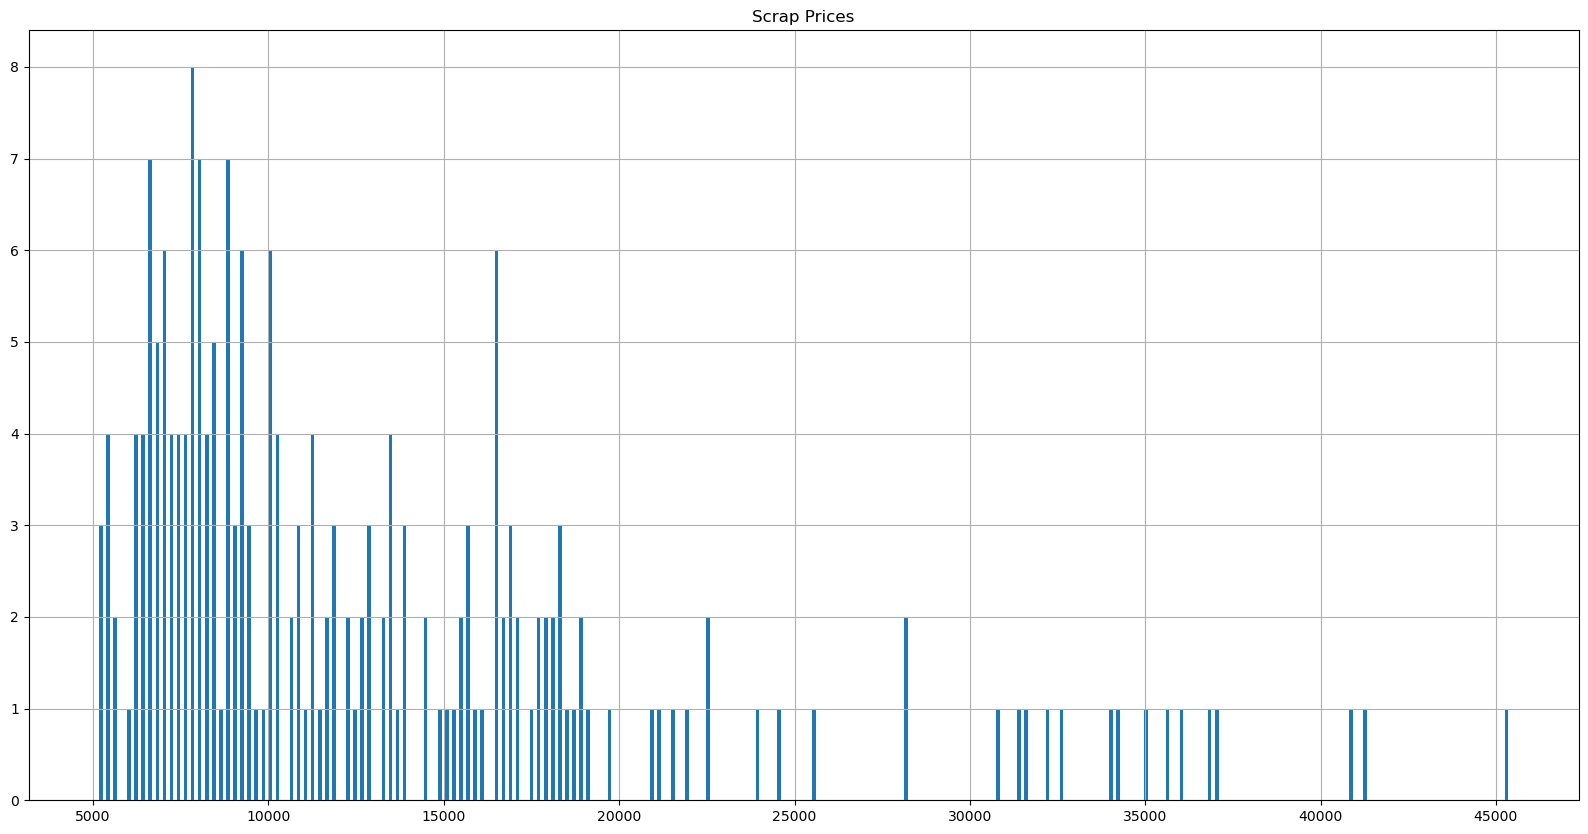

In [87]:
df['price'].hist(bins=200,rwidth = 0.5,figsize=(20,10))
plt.title('Scrap Prices')
plt.show()

In [90]:
df_p= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_p

,Actual,Predicted
15,1.689850,1.511140
9,0.956097,0.942081
100,-0.265860,-0.305290
132,0.210728,0.634308
68,1.590767,1.627941
...,...,...
56,0.209858,0.287877
128,1.888057,1.303072
76,-1.890727,-1.357746
144,-0.346145,-0.505515


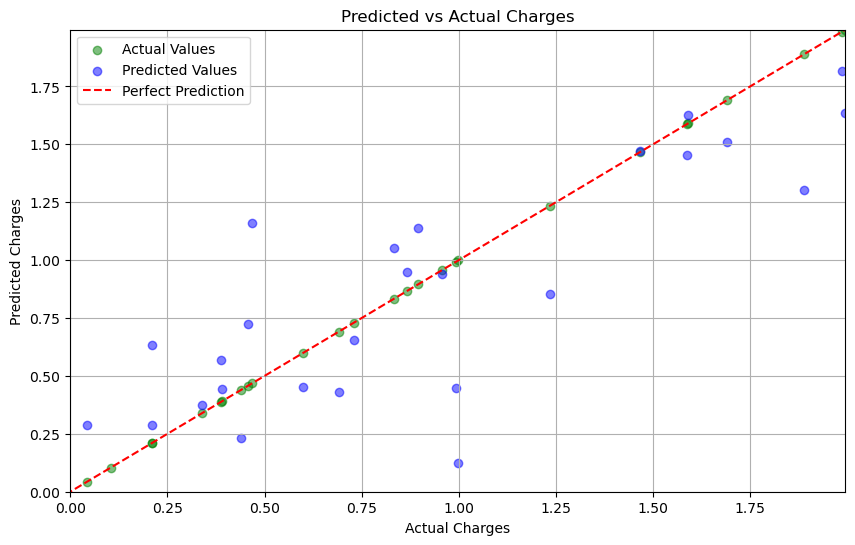

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='green', alpha=0.5, label='Actual Values')
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Predicted vs Actual Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.xlim([0, y_test.max()])
plt.ylim([0, y_test.max()])
plt.grid()
plt.legend()
plt.show()